# Front Matter: CASA0013: Foundations of Spatial Data Science

## Executive Briefing for Airbnb and Rental Market

### Student ID 18079637

### Word Count: 1543

# Reproducible Analysis

Please feel free to add as many code cells and markdown cells of comment/explanation as needed to make your code legible and clear. Your code should output any figures needed to disk.

In [1]:
# Average monthly rental costs in Greater London as of May 2021, by borough:
#https://www.statista.com/statistics/752279/average-rental-costs-in-greater-london-boroughs/

#Private rental market in London: January to December 2020
#https://www.ons.gov.uk/peoplepopulationandcommunity/housing/adhocs/12871privaterentalmarketinlondonjanuarytodecember2020

In [2]:
#First import packages
import os
import json
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import statsmodels.api as sms
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [3]:
#read in airbnb data
a13 = pd.read_csv('london/tomslee_airbnb_london_0007_2013-12-21.csv')
a14 = pd.read_csv('london/tomslee_airbnb_london_0013_2014-05-13.csv')
a15 = pd.read_csv('london/tomslee_airbnb_london_0250_2015-12-25.csv')
a16 = pd.read_csv('london/tomslee_airbnb_london_0730_2016-12-26.csv')
a17 = pd.read_csv('london/tomslee_airbnb_london_1486_2017-07-28.csv')
a20 = pd.read_csv('20_listings.csv')
a21 = pd.read_csv('21_listings.csv')
a21['price'] = a21.price.str.replace('$','').str.replace(',','').astype(float)
a20['price'] = a20.price.str.replace('$','').str.replace(',','').astype(float)

#read in rental price data
rent_cost21 = pd.read_excel('cost/statistic_id752279_average-monthly-rental-costs-in-greater-london-may-2021-by-borough.xlsx',
                            'Data',
                            skiprows=range(1,5))
rent_cost21 = rent_cost21.iloc[:, 1:3]

#clean data
rent_cost20 = pd.read_excel('cost/londonrentalstatisticsq42020.xls',
                            'Table 1.2',
                            skiprows=range(1,13),
                            nrows = 198 )
rent_cost20 = rent_cost20.iloc[:, 1:8]

#read in total number of household and clean the data
household_20 = pd.read_excel('cost/tenure-households-borough.xlsx',
                             '2020',
                            skiprows=range(1,4),
                            nrows = 32)
household_20 = household_20.iloc[:, 1:7]
household_20.rename(columns = {'Unnamed: 1':'Borough',
                               'Numbers': 'Own Outright',
                               'Unnamed: 3': 'Buying with mortgage', 
                               'Unnamed: 4':'Rented from Local Authority or Housing Association', 
                               'Unnamed: 5': 'Rented from Private landlord'}, inplace = True)
#read in geo file
boros = gpd.read_file('neighbourhoods.geojson')
boros = boros.to_crs('epsg:27700')

/tmp/ipykernel_300/2357499314.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  a21['price'] = a21.price.str.replace('$','').str.replace(',','').astype(float)
/tmp/ipykernel_300/2357499314.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  a20['price'] = a20.price.str.replace('$','').str.replace(',','').astype(float)


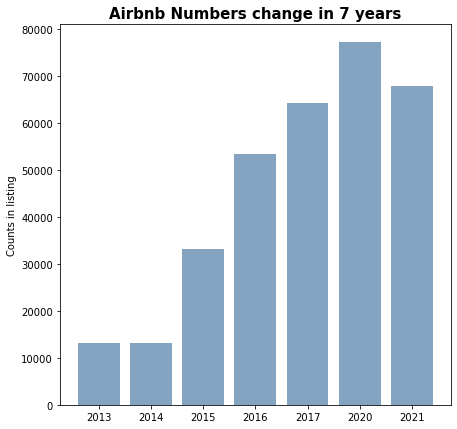

In [4]:
#count total rows for each csv, to compare total listig for the year.
count_a13 = len(a13)+1
count_a14 = len(a14)+1
count_a15 = len(a15)+1
count_a16 = len(a16)+1
count_a17 = len(a17)+1
count_a20 = len(a20)+1
count_a21 = len(a21)+1
#set as x and y

x = ['2013','2014','2015','2016','2017','2020','2021']
y = [count_a13, count_a14, count_a15, count_a16, count_a17, count_a20, count_a21]


#plot bar chart

plt.rcParams["figure.figsize"] = [7, 7]
plt.bar(x,y, color=(0.2, 0.4, 0.6, 0.6))
plt.title('Airbnb Numbers change in 7 years', weight='bold', size=15)
plt.ylabel('Counts in listing')
plt.savefig('ano_change7')
plt.show()

In [5]:
#household_20

Text(0.5, 0, 'Counts')

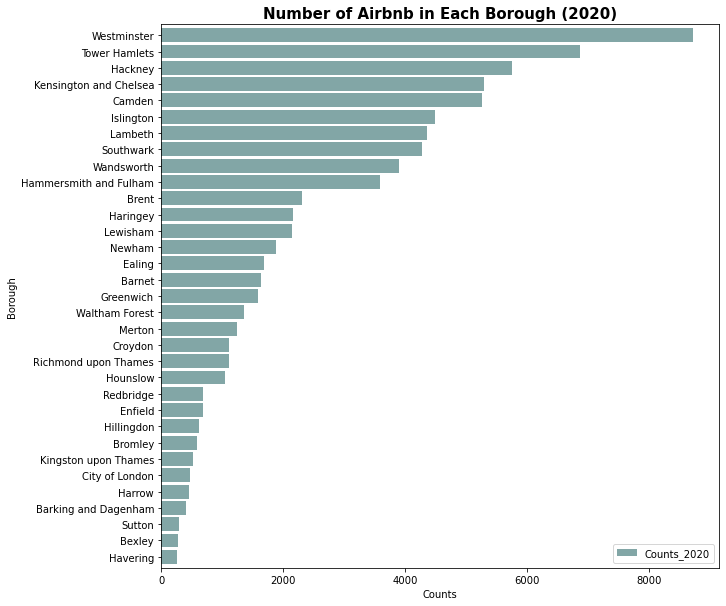

In [6]:
#count number of airbnb in each borough for 2020
borough_count20 = pd.DataFrame(a20.groupby('neighbourhood_cleansed').size())
borough_count20 = borough_count20.reset_index(level=['neighbourhood_cleansed'])
borough_count20.rename(columns = {0:'Counts_2020', 'neighbourhood_cleansed': 'Borough'}, inplace = True)
borough_count20 = borough_count20.sort_values('Counts_2020')

#plot bar chart
borough_count20.plot.barh(x='Borough', 
                       y='Counts_2020', 
                       rot=0, 
                       color=(0.3, 0.5, 0.5, 0.7),
                       figsize=(10,10),
                       width=0.85);

plt.title('Number of Airbnb in Each Borough (2020)', weight='bold', size=15)
plt.xlabel('Counts')

Text(0.5, 0, 'Counts')

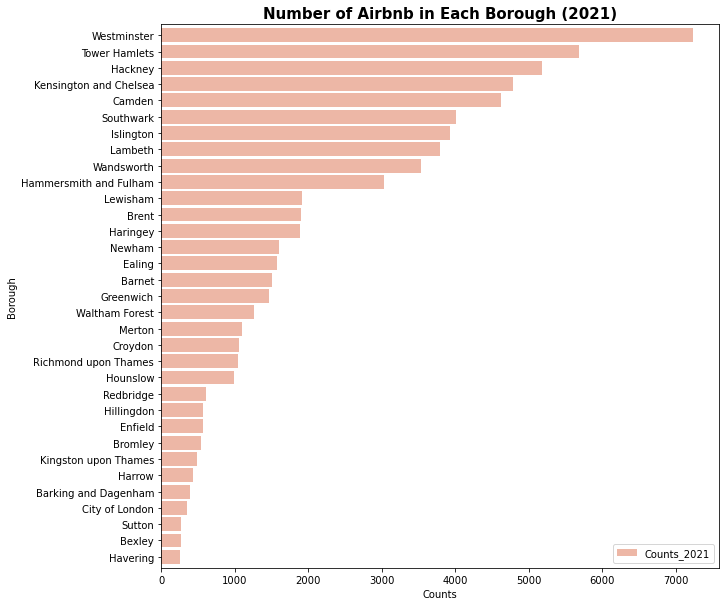

In [7]:
#count number of airbnb in each borough for 2021
borough_count21 = pd.DataFrame(a21.groupby('neighbourhood_cleansed').size())
borough_count21 = borough_count21.reset_index(level=['neighbourhood_cleansed'])
borough_count21.rename(columns = {0:'Counts_2021', 'neighbourhood_cleansed': 'Borough'}, inplace = True)
borough_count21 = borough_count21.sort_values('Counts_2021')

#plot bar chart
borough_count21.plot.barh(x='Borough',
                       y='Counts_2021',
                       rot=0, 
                       color=(0.9, 0.6, 0.5, 0.7),
                       figsize=(10,10),
                       width=0.85);

plt.title('Number of Airbnb in Each Borough (2021)', weight='bold', size=15)
plt.xlabel('Counts')

In [8]:
borough_count21

,Borough,Counts_2021
15,Havering,255
2,Bexley,273
28,Sutton,275
6,City of London,356
0,Barking and Dagenham,390
14,Harrow,430
20,Kingston upon Thames,489
4,Bromley,543
9,Enfield,571
16,Hillingdon,577


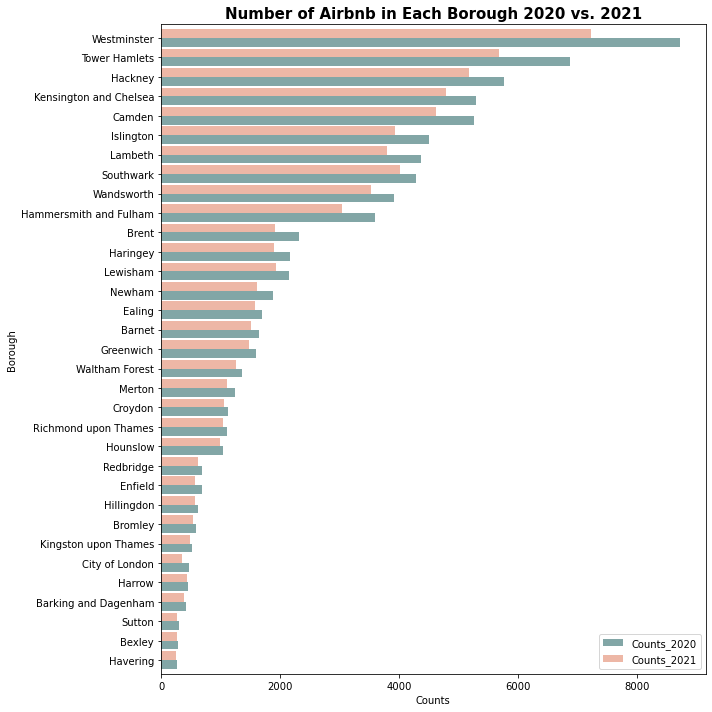

In [9]:
two_yr_count = borough_count20.merge(borough_count21, on=["Borough"], how = 'inner')
#plot bar chart, to see the number of changes of airbnb each borough
two_yr_count.plot.barh(x='Borough',
                       y=['Counts_2020','Counts_2021'],
                       rot=0, 
                       color=[(0.3, 0.5, 0.5, 0.7),(0.9, 0.6, 0.5, 0.7)],
                       figsize=(10,10),
                       width=0.9);

plt.title('Number of Airbnb in Each Borough 2020 vs. 2021', weight='bold', size=15)
plt.xlabel('Counts')
plt.tight_layout()
plt.savefig('borough_counts')

In [10]:
#check room_type for each borough
borough_count20_rtype = pd.DataFrame(a20.groupby(['neighbourhood_cleansed','room_type']).size())
#borough_count20_rtype = borough_count20_rtype.reset_index(level=['room_type'])
borough_count20_rtype.rename(columns = {0:'count_room', 'neighbourhood_cleansed': 'Borough'}, inplace = True)
borough_count20_rtype.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 125 entries, ('Barking and Dagenham', 'Entire home/apt') to ('Westminster', 'Shared room')
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   count_room  125 non-null    int64
dtypes: int64(1)
memory usage: 1.6+ KB


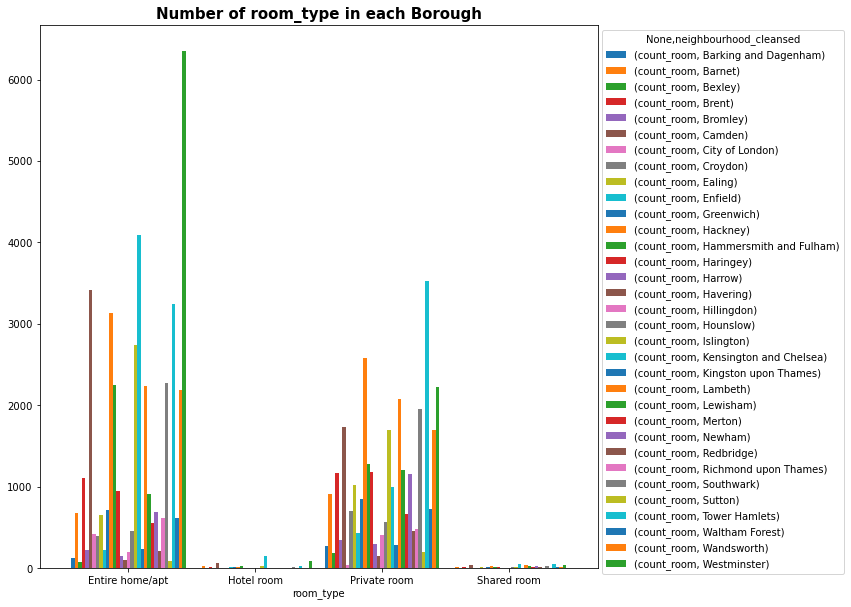

In [11]:
#plot to check what room_type appears most in London boroughs
ax2 = borough_count20_rtype.unstack(level=0).plot(kind='bar',
                                                  subplots=False,
                                                  rot=0,
                                                  figsize=(10, 10),
                                                  legend = True,
                                                  width=0.9)
                                                  #layout = (33,3))
leg2 = ax2.get_legend()
leg2.set_bbox_to_anchor((0., 0., 1.45, 1))
plt.title('Number of room_type in each Borough', weight='bold', size=15) 
plt.show()

In [12]:
#drop na and outliers
a20.drop(a20[((a20.latitude.isna())|(a20.longitude.isna()))].index, axis=0, inplace=True)
a20.drop(a20[((a20.latitude < 40)|(a20.longitude > 1))].index, axis=0, inplace=True)
print(a17.shape)
# transform data
ga20 = gpd.GeoDataFrame(a20, geometry=gpd.points_from_xy(a20.longitude, a20.latitude, crs='epsg:4326'))
ga20 = ga20.to_crs('epsg:27700')

(64144, 19)


In [13]:
#join shp file with csv data
ga20_bo = gpd.sjoin(ga20, boros, op='within', how='left')

#keep only useful data
ga20_bo = ga20_bo.loc[:, ['neighbourhood_cleansed',
                        'geometry',
                        'price',
                        'availability_30',
                        'availability_60',
                        'availability_90',
                        'availability_365',
                        'room_type']]

print(ga20_bo.columns.values)

['neighbourhood_cleansed' 'geometry' 'price' 'availability_30'
 'availability_60' 'availability_90' 'availability_365' 'room_type']


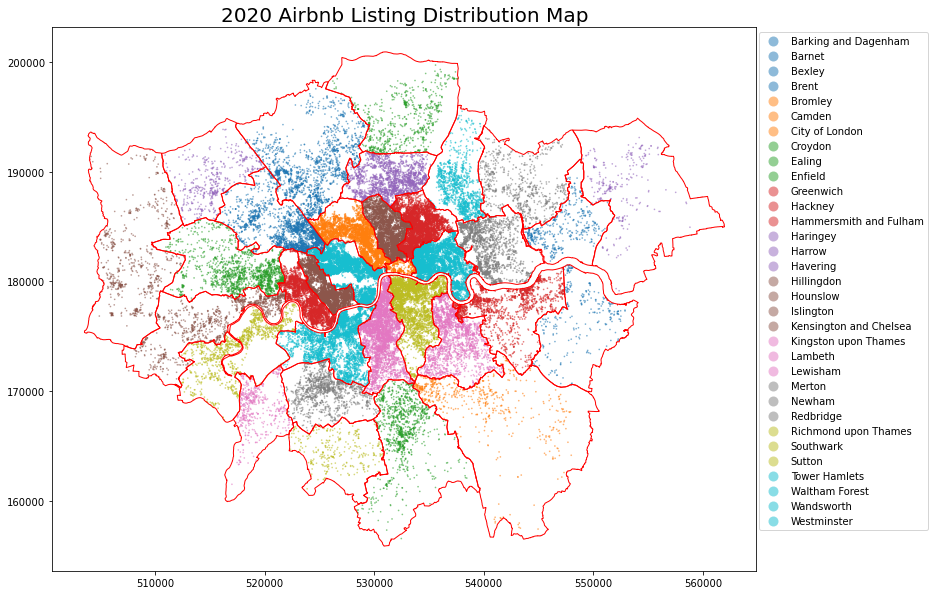

In [14]:
#plot map
ax = ga20_bo.plot(column='neighbourhood_cleansed', markersize=0.5, alpha=0.5, figsize=(20,10),legend=True)
boros.plot(ax=ax, edgecolor='r', facecolor='None', alpha=1, legend = True);
ax.set_title('2020 Airbnb Listing Distribution Map', fontsize=20)

leg = ax.get_legend()
leg.set_bbox_to_anchor((0., 0., 1.25, 1))

In [15]:
#drop na and outliers
a21.drop(a21[((a21.latitude.isna())|(a21.longitude.isna()))].index, axis=0, inplace=True)
a21.drop(a21[((a21.latitude < 40)|(a21.longitude > 1))].index, axis=0, inplace=True)
print(a17.shape)
# transform data
ga21 = gpd.GeoDataFrame(a21, geometry=gpd.points_from_xy(a21.longitude, a21.latitude, crs='epsg:4326'))
ga21 = ga21.to_crs('epsg:27700')

(64144, 19)


In [16]:
#join shp file with csv data
ga21_bo = gpd.sjoin(ga21, boros, op='within', how='left')

#keep only useful data
ga21_bo = ga20_bo.loc[:, ['neighbourhood_cleansed',
                        'geometry',
                        'price',
                        'availability_30',
                        'availability_60',
                        'availability_90',
                        'availability_365',
                        'room_type']]

print(ga20_bo.columns.values)

['neighbourhood_cleansed' 'geometry' 'price' 'availability_30'
 'availability_60' 'availability_90' 'availability_365' 'room_type']


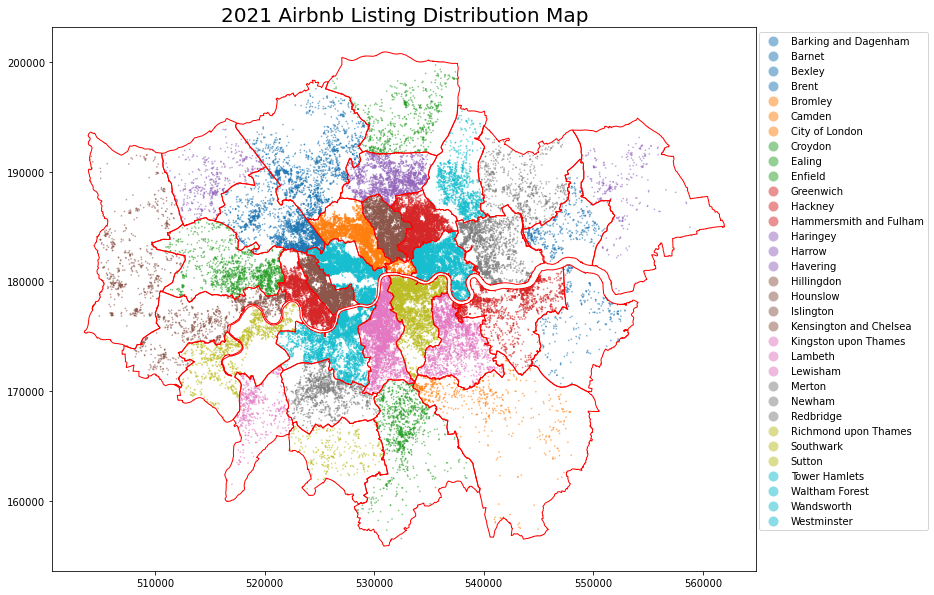

In [17]:
#plot map to see density
ax = ga21_bo.plot(column='neighbourhood_cleansed', markersize=0.5, alpha=0.5, figsize=(20,10), legend=True)
boros.plot(ax=ax, edgecolor='r', facecolor='None', alpha=1, legend = True);
ax.set_title('2021 Airbnb Listing Distribution Map', fontsize=20)

leg = ax.get_legend()
leg.set_bbox_to_anchor((0., 0., 1.25, 1))

In [18]:
#calculate the several measures for 2020 airbnb data
#group by borough and room types
airbnb_price20_difftype = ga20.groupby(['neighbourhood_cleansed','room_type']).agg(
    {'price':['count','sum','mean','median','std',lambda x: x.quantile(0.25),lambda x: x.quantile(0.75)]}
).reset_index()

airbnb_price20_difftype

neighbourhood_cleansed        room_type price                          \
                                            count         sum        mean   
0     Barking and Dagenham  Entire home/apt   130    13104.00  100.800000   
1     Barking and Dagenham     Private room   277    13686.00   49.407942   
2     Barking and Dagenham      Shared room     4      416.00  104.000000   
3                   Barnet  Entire home/apt   681    85465.00  125.499266   
4                   Barnet       Hotel room    30     4581.00  152.700000   
..                     ...              ...   ...         ...         ...   
120             Wandsworth      Shared room    12     1609.00  134.083333   
121            Westminster  Entire home/apt  6354  1694795.22  266.728867   
122            Westminster       Hotel room    92    17402.00  189.152174   
123            Westminster     Private room  2226   223516.00  100.411500   
124            Westminster      Shared room    45     2495.00   55.444444   

                                               
    median          std <lambda_0> <lambda_1>  
0     82.0    64.960381      55.00      120.0  
1     35.0   124.898523      25.00       46.0  
2    105.0    51.613952      85.00      124.0  
3    100.0   110.274939      69.00      150.0  
4     80.0   151.754827      80.00       90.0  
..     ...          ...        ...        ...  
120   50.0   232.560240      33.75       90.0  
121  150.0  1012.532142     100.00      238.0  
122  135.5   162.749044      79.75      256.5  
123   60.0   191.123424      43.00       85.0  
124   30.0    64.754275      20.00       70.0  

[125 rows x 9 columns]

In [19]:
#calculate the several measures for 2020 airbnb data
#group by borough (per night)
airbnb_price20_total = ga20.groupby(['neighbourhood_cleansed']).agg(
    {'price':['count','sum','mean','median','std',lambda x: x.quantile(0.25),lambda x: x.quantile(0.75)]}
).reset_index()

airbnb_price20_total

neighbourhood_cleansed price                                              \
                           count         sum        mean median          std   
0     Barking and Dagenham   411    27206.00   66.194647   43.0   111.500918   
1                   Barnet  1641   139843.00   85.218160   55.0   104.095400   
2                   Bexley   277    16581.00   59.859206   40.0    58.109514   
3                    Brent  2319   225398.00   97.196205   65.0   188.669763   
4                  Bromley   588    41978.00   71.391156   50.0    87.974365   
5                   Camden  5261   668625.00  127.090857   92.0   172.698157   
6           City of London   471   139694.29  296.590849  123.0  1521.588222   
7                  Croydon  1118    64651.00   57.827370   40.0    53.722818   
8                   Ealing  1693   150077.00   88.645600   50.0   132.381146   
9                  Enfield   681    48588.00   71.348018   50.0    76.072281   
10               Greenwich  1597   134392.00   84.152786   60.0    85.546924   
11                 Hackney  5756   510038.57   88.609897   70.0    92.249290   
12  Hammersmith and Fulham  3593   436880.00  121.591984   89.0   134.841332   
13                Haringey  2160   189102.00   87.547222   50.0   287.545901   
14                  Harrow   457    34552.00   75.606127   46.0   139.477731   
15                Havering   264    19847.00   75.178030   50.0    79.655309   
16              Hillingdon   620    38743.00   62.488710   45.0    64.625839   
17                Hounslow  1045    97151.00   92.967464   60.0   105.973389   
18               Islington  4497   587628.00  130.671114   80.0   667.412115   
19  Kensington and Chelsea  5297  1026787.00  193.843119  125.0   479.508283   
20    Kingston upon Thames   519    44343.00   85.439306   55.0   169.132752   
21                 Lambeth  4364   404454.00   92.679652   68.0   103.110334   
22                Lewisham  2151   172405.00   80.151093   50.0   238.954819   
23                  Merton  1240   134667.00  108.602419   65.0   224.058243   
24                  Newham  1877   173418.00   92.391050   51.0   427.828136   
25               Redbridge   686    50682.00   73.880466   45.0   103.857357   
26    Richmond upon Thames  1109   137734.00  124.196573   88.0   144.847702   
27               Southwark  4282   455388.29  106.349437   73.0   325.914593   
28                  Sutton   295    27201.00   92.206780   45.0   315.138251   
29           Tower Hamlets  6873   625701.00   91.037538   65.0   164.075502   
30          Waltham Forest  1367    95971.00   70.205560   50.0   106.254085   
31              Wandsworth  3910   442335.00  113.129156   80.0   114.789665   
32             Westminster  8717  1938208.22  222.348081  120.0   873.088854   

                          
   <lambda_0> <lambda_1>  
0        30.0      70.00  
1        35.0      99.00  
2        27.0      70.00  
3        39.0     100.00  
4        35.0      80.00  
5        57.0     150.00  
6        90.5     172.50  
7        30.0      70.00  
8        35.0      95.00  
9        30.0      85.00  
10       35.0     100.00  
11       40.0     104.00  
12       55.0     142.00  
13       33.0      85.25  
14       30.0      80.00  
15       30.0     101.25  
16       31.0      75.00  
17       36.0     105.00  
18       50.0     120.00  
19       80.0     207.00  
20       38.0      90.00  
21       40.0     103.00  
22       31.0      80.00  
23       40.0     120.00  
24       31.0     100.00  
25       30.0      75.00  
26       50.0     150.00  
27       45.0     115.00  
28       30.0      70.00  
29       39.0     105.00  
30       31.0      85.00  
31       48.0     136.00  
32       75.0     200.00

In [20]:
#calculate the several measures for 2020 airbnb data
#group by borough (a mounth)
# ga20['30d_price'] = ga20['price'] * 30

# airbnb_price20_total_30d = ga20.groupby(['neighbourhood_cleansed']).agg(
#     {'30d_price':['count','sum','mean','median','std',lambda x: x.quantile(0.25),lambda x: x.quantile(0.75)]}
# ).reset_index()

# airbnb_price20_total_30d

In [21]:
airbnb_price20_total.columns = airbnb_price20_total.columns.droplevel(0)
print(airbnb_price20_total.columns.values)

['' 'count' 'sum' 'mean' 'median' 'std' '<lambda_0>' '<lambda_1>']


In [22]:
cols_20 = airbnb_price20_total.columns.values
cols_20[ 0] = 'Borough'
cols_20[-2] = 'lq'
cols_20[-1] = 'uq'
airbnb_price20_total.columns = cols_20
airbnb_price20_total

,Borough,count,sum,mean,median,std,lq,uq
0,Barking and Dagenham,411,27206.00,66.194647,43.0,111.500918,30.0,70.00
1,Barnet,1641,139843.00,85.218160,55.0,104.095400,35.0,99.00
2,Bexley,277,16581.00,59.859206,40.0,58.109514,27.0,70.00
3,Brent,2319,225398.00,97.196205,65.0,188.669763,39.0,100.00
4,Bromley,588,41978.00,71.391156,50.0,87.974365,35.0,80.00
5,Camden,5261,668625.00,127.090857,92.0,172.698157,57.0,150.00
6,City of London,471,139694.29,296.590849,123.0,1521.588222,90.5,172.50
7,Croydon,1118,64651.00,57.827370,40.0,53.722818,30.0,70.00
8,Ealing,1693,150077.00,88.645600,50.0,132.381146,35.0,95.00
9,Enfield,681,48588.00,71.348018,50.0,76.072281,30.0,85.00


In [23]:
#calculate the several measures for 2021 airbnb data
#group by borough and room types
airbnb_price21_difftype = ga21.groupby(['neighbourhood_cleansed','room_type']).agg(
    {'price':['count','sum','mean','median','std',lambda x: x.quantile(0.25),lambda x: x.quantile(0.75)]}
).reset_index()

airbnb_price21_difftype

neighbourhood_cleansed        room_type price                         \
                                            count        sum        mean   
0     Barking and Dagenham  Entire home/apt   133    15176.0  114.105263   
1     Barking and Dagenham     Private room   253    14047.0   55.521739   
2     Barking and Dagenham      Shared room     4      506.0  126.500000   
3                   Barnet  Entire home/apt   656    87689.0  133.672256   
4                   Barnet       Hotel room     9     2491.0  276.777778   
..                     ...              ...   ...        ...         ...   
113             Wandsworth      Shared room    12     1685.0  140.416667   
114            Westminster  Entire home/apt  5211  1505952.0  288.994819   
115            Westminster       Hotel room    73    20052.0  274.684932   
116            Westminster     Private room  1903   270708.0  142.253284   
117            Westminster      Shared room    43     1894.0   44.046512   

                                              
    median         std <lambda_0> <lambda_1>  
0    100.0   71.052505       65.0     145.00  
1     38.0  132.225024       27.0      50.00  
2    120.0   29.137605      107.5     139.00  
3    100.0  109.365125       70.0     166.25  
4    440.0  194.835044       87.0     440.00  
..     ...         ...        ...        ...  
113   64.0  233.790683       30.0      91.50  
114  165.0  612.965026      107.5     288.00  
115  170.0  297.709491      111.0     339.00  
116   70.0  291.927277       49.0     102.00  
117   25.0   57.211368       19.0      35.00  

[118 rows x 9 columns]

In [24]:
#calculate the several measures for 2021 airbnb data
#group only by borough
airbnb_price21_total = ga21.groupby(['neighbourhood_cleansed']).agg(
    {'price':['count','sum','mean','median','std',lambda x: x.quantile(0.25),lambda x: x.quantile(0.75)]}
).reset_index()

airbnb_price21_total

neighbourhood_cleansed price                                            \
                           count        sum        mean median         std   
0     Barking and Dagenham   390    29729.0   76.228205   49.5  117.648016   
1                   Barnet  1504   199377.0  132.564495   61.0  257.184572   
2                   Bexley   273    18486.0   67.714286   45.0  101.602848   
3                    Brent  1908   239207.0  125.370545   69.0  279.850171   
4                  Bromley   543    42963.0   79.121547   55.0  100.215156   
5                   Camden  4619   720846.0  156.061052  100.0  253.799768   
6           City of London   356    85812.0  241.044944  145.0  943.055468   
7                  Croydon  1055    71260.0   67.545024   45.0  115.314945   
8                   Ealing  1575   143942.0   91.391746   55.0  138.527914   
9                  Enfield   571    41413.0   72.527145   50.0   79.929336   
10               Greenwich  1472   200276.0  136.057065   69.0  270.271077   
11                 Hackney  5178   537312.0  103.768250   75.0  153.077989   
12  Hammersmith and Fulham  3036   430410.0  141.768775   95.0  174.663272   
13                Haringey  1890   181552.0   96.059259   55.0  298.998522   
14                  Harrow   430    33324.0   77.497674   50.0   95.814524   
15                Havering   255    21230.0   83.254902   50.0   90.576162   
16              Hillingdon   577    53018.0   91.885615   50.0  182.235008   
17                Hounslow   989   110300.0  111.526795   60.0  190.447594   
18               Islington  3928   562866.0  143.295825   88.0  293.889345   
19  Kensington and Chelsea  4788  1005047.0  209.909566  146.5  269.886631   
20    Kingston upon Thames   489    50629.0  103.535787   64.0  209.289967   
21                 Lambeth  3799   384516.0  101.215057   72.0  118.587560   
22                Lewisham  1924   173420.0   90.135135   55.0  282.319015   
23                  Merton  1101   133715.0  121.448683   75.0  247.898620   
24                  Newham  1606   146605.0   91.285803   58.0  105.989736   
25               Redbridge   617    49222.0   79.776337   50.0  116.415464   
26    Richmond upon Thames  1046   143775.0  137.452199   90.0  173.245085   
27               Southwark  4008   702789.0  175.346557   80.0  436.034391   
28                  Sutton   275    21439.0   77.960000   50.0  301.623179   
29           Tower Hamlets  5679   606361.0  106.772495   70.0  250.827945   
30          Waltham Forest  1260    95056.0   75.441270   50.0  111.663239   
31              Wandsworth  3532   470837.0  133.306059   87.0  185.152841   
32             Westminster  7230  1798606.0  248.769848  136.0  546.371886   

                          
   <lambda_0> <lambda_1>  
0       32.00      98.75  
1       36.00     112.25  
2       28.00      74.00  
3       40.00     120.00  
4       35.00      89.00  
5       60.00     165.00  
6      107.25     204.25  
7       30.00      78.50  
8       35.00      97.00  
9       33.00      84.50  
10      39.75     120.00  
11      40.25     115.00  
12      55.00     150.00  
13      35.00      94.75  
14      32.00      90.00  
15      31.00     103.50  
16      35.00      89.00  
17      40.00     120.00  
18      51.00     135.00  
19      90.00     223.00  
20      40.00     100.00  
21      43.00     115.00  
22      35.00      90.00  
23      40.00     130.00  
24      35.00     110.00  
25      30.00      80.00  
26      56.00     150.00  
27      46.00     135.00  
28      32.00      69.50  
29      40.00     119.00  
30      34.00      90.00  
31      50.00     150.00  
32      83.00     249.00

In [25]:
airbnb_price21_total.columns = airbnb_price21_total.columns.droplevel(0)
print(airbnb_price21_total.columns.values)

['' 'count' 'sum' 'mean' 'median' 'std' '<lambda_0>' '<lambda_1>']


In [26]:
cols = airbnb_price21_total.columns.values
cols[ 0] = 'Borough'
cols[-2] = 'lq'
cols[-1] = 'uq'
airbnb_price21_total.columns = cols
airbnb_price21_total

,Borough,count,sum,mean,median,std,lq,uq
0,Barking and Dagenham,390,29729.0,76.228205,49.5,117.648016,32.00,98.75
1,Barnet,1504,199377.0,132.564495,61.0,257.184572,36.00,112.25
2,Bexley,273,18486.0,67.714286,45.0,101.602848,28.00,74.00
3,Brent,1908,239207.0,125.370545,69.0,279.850171,40.00,120.00
4,Bromley,543,42963.0,79.121547,55.0,100.215156,35.00,89.00
5,Camden,4619,720846.0,156.061052,100.0,253.799768,60.00,165.00
6,City of London,356,85812.0,241.044944,145.0,943.055468,107.25,204.25
7,Croydon,1055,71260.0,67.545024,45.0,115.314945,30.00,78.50
8,Ealing,1575,143942.0,91.391746,55.0,138.527914,35.00,97.00
9,Enfield,571,41413.0,72.527145,50.0,79.929336,33.00,84.50


In [27]:
# Clean the rent cost data
rent_cost20.rename(columns = {'Unnamed: 1':'Borough',
                              'Unnamed: 2': 'bedroom_category',
                              'Unnamed: 3': 'count_of_rents', 
                              'Unnamed: 4':'Mean',
                              'Unnamed: 5': 'Lower quartile',
                              'Unnamed: 6': 'Median',
                              'Unnamed: 7': 'Upper quartile'}, inplace = True)


rent_cost20_clean = rent_cost20[rent_cost20.Mean != '..']
rent_cost20_clean = rent_cost20_clean[rent_cost20_clean.Mean != '.']
rent_cost20_clean = rent_cost20_clean[['Borough',
                                       'bedroom_category', 
                                       'count_of_rents',
                                       'Mean',
                                       'Lower quartile',
                                       'Median',
                                       'Upper quartile']].astype({'Upper quartile': 'int64',
                                                                  'count_of_rents' : 'int64', 
                                                                  'Mean': 'int64', 
                                                                  'Lower quartile' : 'int64',
                                                                  'Median' : 'int64',
                                                                  'Upper quartile' : 'int64'})

rent_cost20_clean

,Borough,bedroom_category,count_of_rents,Mean,Lower quartile,Median,Upper quartile
0,Barking and Dagenham,Room,20,859,542,692,792
1,Barking and Dagenham,Studio,10,792,750,800,850
2,Barking and Dagenham,One Bedroom,150,990,900,1000,1050
3,Barking and Dagenham,Two Bedrooms,220,1220,1150,1200,1300
4,Barking and Dagenham,Three Bedrooms,150,1438,1300,1400,1550
...,...,...,...,...,...,...,...
193,Westminster,Studio,220,1315,1213,1213,1391
194,Westminster,One Bedroom,510,2088,1640,1950,2410
195,Westminster,Two Bedrooms,550,2874,2200,2659,3205
196,Westminster,Three Bedrooms,180,4196,3020,3900,4875


In [28]:
#calculate total number of rents, ignore other variables.
rent_cost20_clean['total_rent_cost'] = rent_cost20_clean['Mean'] * rent_cost20_clean['count_of_rents']
rent_cost20_clean_cal = rent_cost20_clean.groupby('Borough')['count_of_rents','total_rent_cost'].sum()

#calculate the average of rent cost for each borough.
rent_cost20_clean_cal['ave_rtcost_20'] = rent_cost20_clean_cal['total_rent_cost']/rent_cost20_clean_cal['count_of_rents']

rent_cost20_clean_cal = rent_cost20_clean_cal.iloc[:, 2:3]
rent_cost20_clean_cal['ave_rtcost_20_pnt'] = rent_cost20_clean_cal['ave_rtcost_20'] / 30
#rent_cost20_clean_cal

/tmp/ipykernel_300/1915461041.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rent_cost20_clean_cal = rent_cost20_clean.groupby('Borough')['count_of_rents','total_rent_cost'].sum()


In [29]:
#rename columns
rent_cost21.rename(columns = {'Unnamed: 1':'Borough',
                              'Unnamed: 2': 'ave_rtcost_21'}, inplace = True)

#clean the rent cost data for 2021
key = []
value = []
for i in range(len(rent_cost21.Borough)):
        temp = rent_cost21.Borough.loc[i].replace('&',',').replace(' and',',')
        temp =temp.split(',')
        print(temp)
        temp = [t.strip() for t in temp]
        for t in temp:
            key.append(t)
            value.append(rent_cost21.ave_rtcost_21.loc[i])
#df1 = pd.DataFrame({'borough': key, 'average rental':value})       
rent_cost21_clean = pd.DataFrame({'Borough': key, 'average_rental':value})

['Westminster']
['Lambeth']
['Chelsea', ' Fulham', ' Hammersmith ', ' Kensington']
['Wandsworth']
['Camden ', ' City of London']
['Tower Hamlets']
['Brent']
['Harringey ', ' Islington']
['Lewisham ', ' Southwark']
['Barnet']
['Enfield']
['Bromley']
['Hounslow ', ' Richmond upon Thames']
['Ealing']
['Kingston upon Thames', ' Merton ', ' Sutton']
['Hackney ', ' Newham']
['Harrow ', ' Hillingdon']
['Bexley ', ' Greenwich']
['Barking', ' Dagenham', ' Havering']
['Redbridge ', ' Waltham Forest']
['Croyden']


In [30]:
rent_cost21_clean.loc[rent_cost21_clean[rent_cost21_clean.Borough == 'Croyden'].index, 'Borough'] = 'Croydon'
rent_cost21_clean.loc[rent_cost21_clean[rent_cost21_clean.Borough == 'Chelsea'].index, 'Borough'] = 'Kensington and Chelsea'
rent_cost21_clean.loc[rent_cost21_clean[rent_cost21_clean.Borough == 'Fulham'].index, 'Borough'] = 'Hammersmith and Fulham'
rent_cost21_clean.loc[rent_cost21_clean[rent_cost21_clean.Borough == 'Harringey'].index, 'Borough'] = 'Haringey'
rent_cost21_clean.loc[rent_cost21_clean[rent_cost21_clean.Borough == 'Barking'].index, 'Borough'] = 'Barking and Dagenham'
rent_cost21_clean = rent_cost21_clean.drop(rent_cost21_clean[rent_cost21_clean.Borough == 'Hammersmith'].index)
rent_cost21_clean = rent_cost21_clean.drop(rent_cost21_clean[rent_cost21_clean.Borough == 'Kensington'].index)
rent_cost21_clean = rent_cost21_clean.drop(rent_cost21_clean[rent_cost21_clean.Borough == 'Dagenham'].index)

#calculate the rent per night
rent_cost21_clean['ave_rtcost_21_pnt'] = rent_cost21_clean['average_rental']/30
#rent_cost21_clean.sort_values('ave_rtcost_21_pnt')

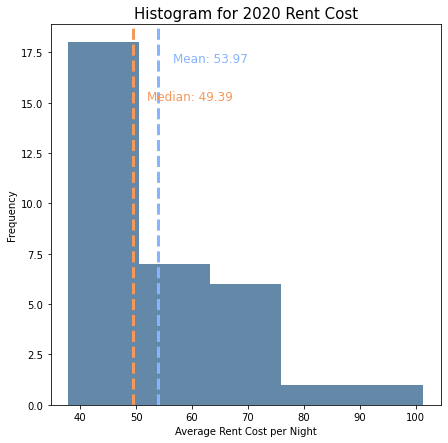

In [31]:
# 2020 rent cost price histogram (by borough)
#To show the mean and median value
rent_cost20_clean_cal.hist(column='ave_rtcost_20_pnt',
                           bins=5,
                           color='#6388a8',
                           grid = False);

#add vertical line to show the mean value
plt.axvline(x=rent_cost20_clean_cal.ave_rtcost_20_pnt.mean(),
            color='#87B4FF',
            ls='--',
            linewidth=3)

min_ylim, max_ylim = plt.ylim()
plt.text(rent_cost20_clean_cal.ave_rtcost_20_pnt.mean()*1.05,
         max_ylim*0.9,
         'Mean: {:.2f}'.format(rent_cost20_clean_cal.ave_rtcost_20_pnt.mean()),
         fontsize=12,
        color='#87B4FF')


#add vertical line to show the median value
plt.axvline(x=rent_cost20_clean_cal.ave_rtcost_20_pnt.median(),
            color='#F5985B',
            ls='--',
            linewidth=3)

min_ylim, max_ylim = plt.ylim()
plt.text(rent_cost20_clean_cal.ave_rtcost_20_pnt.median()*1.05,
         max_ylim*0.8,
         'Median: {:.2f}'.format(rent_cost20_clean_cal.ave_rtcost_20_pnt.median()),
         fontsize=12,
        color = '#F5985B')

plt.xlabel('Average Rent Cost per Night')
plt.ylabel("Frequency");
plt.title ('Histogram for 2020 Rent Cost', fontsize = 15)
plt.savefig('Hist_20rtcost')

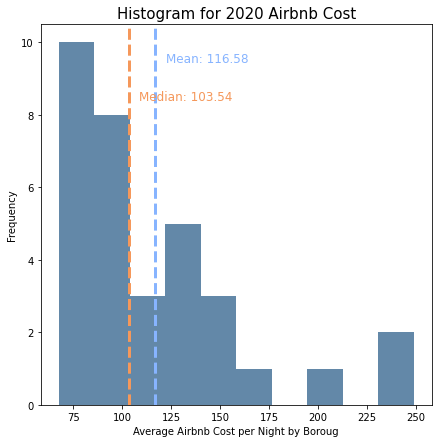

In [32]:
# 2020 aribnb price per night histogram (by borough)
#To show the mean and median value

airbnb_price21_total.rename(columns = {'mean':'ave_price_pn'}, inplace = True)

airbnb_price21_total.hist(column='ave_price_pn',
                           color='#6388a8',
                           grid = False);

#add vertical line to show the mean value
plt.axvline(x=airbnb_price21_total.ave_price_pn.mean(),
            color='#87B4FF',
            ls='--',
            linewidth=3)

min_ylim, max_ylim = plt.ylim()
plt.text(airbnb_price21_total.ave_price_pn.mean()*1.05,
         max_ylim*0.9,
         'Mean: {:.2f}'.format(airbnb_price21_total.ave_price_pn.mean()),
         fontsize=12,
        color='#87B4FF')


#add vertical line to show the median value
plt.axvline(x=airbnb_price21_total.ave_price_pn.median(),
            color='#F5985B',
            ls='--',
            linewidth=3)

min_ylim, max_ylim = plt.ylim()
plt.text(airbnb_price21_total.ave_price_pn.median()*1.05,
         max_ylim*0.8,
         'Median: {:.2f}'.format(airbnb_price21_total.ave_price_pn.median()),
         fontsize=12,
        color = '#F5985B')

plt.xlabel('Average Airbnb Cost per Night by Boroug')
plt.ylabel("Frequency");
plt.title ('Histogram for 2020 Airbnb Cost', fontsize = 15)
plt.savefig('Hist_20acost')

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


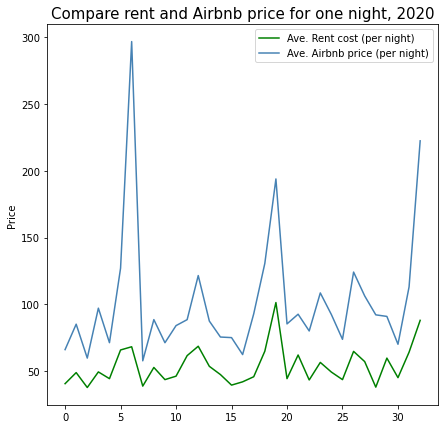

In [33]:
#plot line graph to see the relation between airbnb price and rent cost in each borough

#2020
#join two data in one df
#only keep the mean for airbnb price
airbnb_price20_total_mean = airbnb_price20_total[['Borough','mean']]
airbnb_price20_total_mean.rename(columns = {'mean':'aprice_mean'}, inplace = True)

#join_2020_price
join_2020_price = rent_cost20_clean_cal.merge(airbnb_price20_total_mean, on='Borough' , how = 'inner')

#plot line graph
plt.plot(join_2020_price['ave_rtcost_20_pnt'], label='Ave. Rent cost (per night)', color='green')
plt.plot(join_2020_price['aprice_mean'], label='Ave. Airbnb price (per night)', color='steelblue')
plt.title('Compare rent and Airbnb price for one night, 2020', fontsize = 15)
plt.legend()
plt.ylabel("Price");
plt.savefig('compare')
plt.show()

In [34]:
rent_cost21

,Borough,ave_rtcost_21
0,Westminster,2183
1,Lambeth,2053
2,"Chelsea, Fulham, Hammersmith & Kensington",1920
3,Wandsworth,1870
4,Camden & City of London,1815
5,Tower Hamlets,1611
6,Brent,1610
7,Harringey & Islington,1581
8,Lewisham & Southwark,1548
9,Barnet,1537


/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


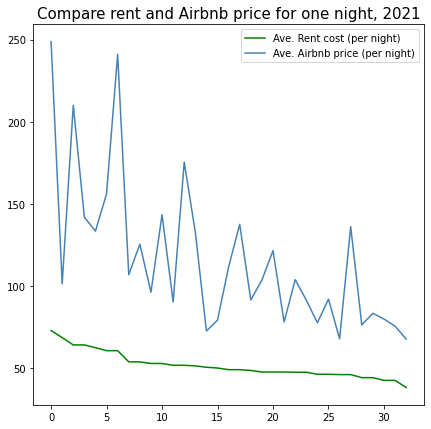

In [35]:
#2021
#join two data in one df
#only keep the mean for airbnb price
airbnb_price21_total_mean = airbnb_price21_total[['Borough','ave_price_pn']]
airbnb_price21_total_mean.rename(columns = {'ave_price_pn':'aprice_mean'}, inplace = True)

#join_2020_price
join_2021_price = rent_cost21_clean.merge(airbnb_price21_total_mean, on='Borough' , how = 'inner')

#plot line graph
plt.plot(join_2021_price['ave_rtcost_21_pnt'], label='Ave. Rent cost (per night)', color='green')
plt.plot(join_2021_price['aprice_mean'], label='Ave. Airbnb price (per night)', color='steelblue')
plt.title('Compare rent and Airbnb price for one night, 2021', fontsize = 15)
plt.legend()
plt.show()

In [36]:
airbnb_price21_total_mean

,Borough,aprice_mean
0,Barking and Dagenham,76.228205
1,Barnet,132.564495
2,Bexley,67.714286
3,Brent,125.370545
4,Bromley,79.121547
5,Camden,156.061052
6,City of London,241.044944
7,Croydon,67.545024
8,Ealing,91.391746
9,Enfield,72.527145


In [37]:
household_20_final = household_20[['Borough','Total']]
#household_20_final

In [38]:
#check airbnb density for each borough
density_20 = borough_count20.merge(household_20_final, on='Borough' , how = 'inner')
density_20['airbnb_density'] = (density_20['Counts_2020']/density_20['Total'])*100
join_2020_reg1 = rent_cost20_clean_cal.merge(density_20, on='Borough' , how = 'inner')
join_2020_reg1

,Borough,ave_rtcost_20,ave_rtcost_20_pnt,Counts_2020,Total,airbnb_density
0,Barking and Dagenham,1221.637931,40.721264,411,76200,0.539370
1,Barnet,1470.259494,49.008650,1641,165400,0.992140
2,Bexley,1135.858824,37.861961,277,100000,0.277000
3,Brent,1485.523438,49.517448,2319,110700,2.094851
4,Bromley,1334.215789,44.473860,588,142700,0.412053
5,Camden,1978.025000,65.934167,5261,110600,4.756781
6,Croydon,1167.111765,38.903725,1118,159400,0.701380
7,Ealing,1585.815451,52.860515,1693,124500,1.359839
8,Enfield,1312.829268,43.760976,681,130200,0.523041
9,Greenwich,1390.000000,46.333333,1597,117100,1.363792


In [39]:
#Merge useful columns together to run the regression 
airbnb_price20_total_count = airbnb_price21_total[['Borough','count']]
join_2020_reg = rent_cost20_clean_cal.merge(airbnb_price20_total_count, on='Borough' , how = 'inner')
join_2020_reg = join_2020_reg[['Borough','count','ave_rtcost_20', 'ave_rtcost_20_pnt']]
join_2020_reg.rename(columns = {'count':'airbnb_count'}, inplace = True)
#join_2020_reg

                            OLS Regression Results                            
Dep. Variable:      ave_rtcost_20_pnt   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     41.56
Date:                Tue, 11 Jan 2022   Prob (F-statistic):           3.47e-07
Time:                        12:21:51   Log-Likelihood:                -120.15
No. Observations:                  33   AIC:                             244.3
Df Residuals:                      31   BIC:                             247.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           42.0510      2.483     16.936   

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


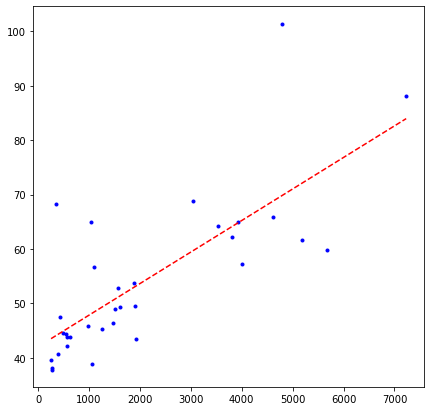

In [40]:
# Regression for number of airbnb and rent
# Use the next line to set figure height and width (experiment to check the scale):
figure_width, figure_height = 7,7

# These lines extract the y-values and the x-values from the data:
x_values = join_2020_reg['airbnb_count'] #first column
y_values = join_2020_reg['ave_rtcost_20_pnt'] #second column

# These lines perform the regression procedure:
X_values = sms.add_constant(x_values)
regression_model_a = sms.OLS(y_values, X_values)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

# Now we store all the relevant values:
gradient  = regression_model_b.params[1]
intercept = regression_model_b.params[0]
Rsquared  = regression_model_b.rsquared
MSE       = regression_model_b.mse_resid
pvalue    = regression_model_b.f_pvalue

# And print them:
print("gradient  =", regression_model_b.params[1])
print("intercept =", regression_model_b.params[0])
print("Rsquared  =", regression_model_b.rsquared)
print("MSE       =", regression_model_b.mse_resid)
print("pvalue    =", regression_model_b.f_pvalue)

# This line creates the endpoints of the best-fit line:
x_lobf = [min(x_values),max(x_values)]
y_lobf = [x_lobf[0]*gradient + intercept,x_lobf[1]*gradient + intercept]

# This line creates the figure. 
plt.figure(figsize=(figure_width,figure_height))

# The next lines create and save the plot:
plt.plot(x_values,y_values,'b.',x_lobf,y_lobf,'r--')

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:      ave_rtcost_20_pnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     142.4
Date:                Tue, 11 Jan 2022   Prob (F-statistic):           6.39e-13
Time:                        12:21:52   Log-Likelihood:                -102.10
No. Observations:                  32   AIC:                             208.2
Df Residuals:                      30   BIC:                             211.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             40.3931      1.537     26.

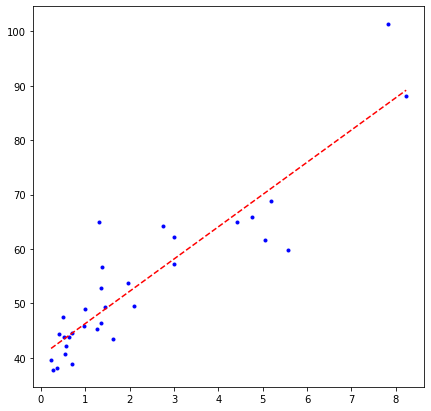

In [41]:
# Regression for density of airbnb and rent
# Use the next line to set figure height and width (experiment to check the scale):
figure_width, figure_height = 7,7

# These lines extract the y-values and the x-values from the data:
x_values = join_2020_reg1['airbnb_density'] #first column
y_values = join_2020_reg1['ave_rtcost_20_pnt'] #second column

# These lines perform the regression procedure:
X_values = sms.add_constant(x_values)
regression_model_a = sms.OLS(y_values, X_values)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

# Now we store all the relevant values:
gradient  = regression_model_b.params[1]
intercept = regression_model_b.params[0]
Rsquared  = regression_model_b.rsquared
MSE       = regression_model_b.mse_resid
pvalue    = regression_model_b.f_pvalue

# And print them:
print("gradient  =", regression_model_b.params[1])
print("intercept =", regression_model_b.params[0])
print("Rsquared  =", regression_model_b.rsquared)
print("MSE       =", regression_model_b.mse_resid)
print("pvalue    =", regression_model_b.f_pvalue)

# This line creates the endpoints of the best-fit line:
x_lobf = [min(x_values),max(x_values)]
y_lobf = [x_lobf[0]*gradient + intercept,x_lobf[1]*gradient + intercept]

# This line creates the figure. 
plt.figure(figsize=(figure_width,figure_height))

# The next lines create and save the plot:
plt.plot(x_values,y_values,'b.',x_lobf,y_lobf,'r--')

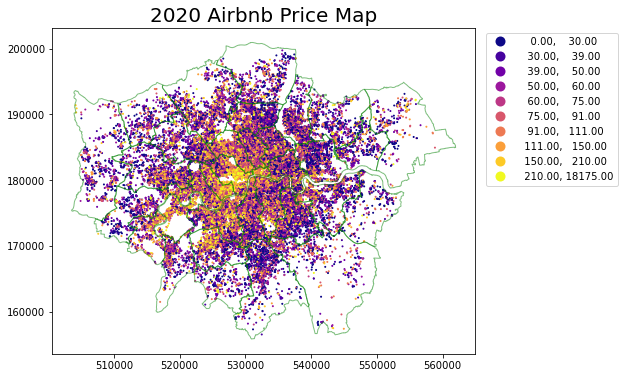

In [42]:
#price plot
ax1 = ga20_bo.plot(column='price',
             cmap='plasma',
             scheme='quantiles',
             k=10,
             markersize=1,
             figsize=(8,6),
             legend = True);

boros.plot(ax=ax1, edgecolor='g', facecolor='None', alpha=0.5, legend = True);
ax1.set_title('2020 Airbnb Price Map', fontsize=20)

lege = ax1.get_legend()
lege.set_bbox_to_anchor((0., 0., 1.35, 1))